In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir datasets

In [3]:
!unzip /content/drive/MyDrive/SPARK_AIVLE/dataset.zip -d /content/datasets

Archive:  /content/drive/MyDrive/SPARK_AIVLE/dataset.zip
  inflating: /content/datasets/answer_sample.csv  
  inflating: /content/datasets/test_data.csv  
  inflating: /content/datasets/train_data.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
df = pd.read_csv('./datasets/train_data.csv')

df_copy = df.copy()

df.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0


In [162]:
# read & manipulate data
import pandas as pd 
import numpy as np
import tensorflow as tf

# visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# misc
import random as rn

# load the dataset
df = df

# manual parameters
RANDOM_SEED = 42
TRAINING_SAMPLE = len(df)
VALIDATE_SIZE = 0.2

# setting random seeds for libraries to ensure reproducibility
np.random.seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)

In [163]:
# 설비 번호 [0, 4, 5, 6, 7]: 30HP(마력)
# 설비 번호 1: 20HP
# 설비 번호 2: 10HP
# 설비 번호 3: 50HP

mapping = {0:1, 1:0, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1}

df['label'] = df['type'].map(mapping)
df

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0,1
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0,1
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0,1
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0,1
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0,1
...,...,...,...,...,...,...,...,...,...
2458,2.28,50.20,0.7,29.53,2416.0,66.84,3.34,7,1
2459,2.04,46.94,0.7,26.34,2155.0,63.94,3.20,7,1
2460,1.19,35.74,0.7,15.39,1259.0,53.99,2.70,7,1
2461,1.21,36.00,0.7,15.64,1280.0,54.22,2.71,7,1


In [164]:
df['label'].value_counts()

1    2094
0     369
Name: label, dtype: int64

<Axes: xlabel='motor_vibe', ylabel='Count'>

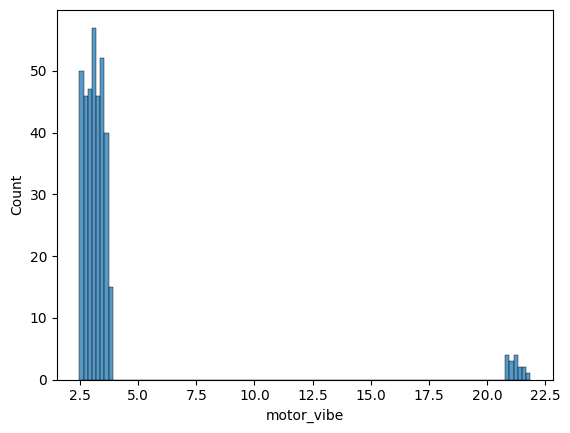

In [165]:
sns.histplot(df.loc[df['label'] == 0, 'motor_vibe'])

In [166]:
df_copy = df.drop(df.loc[df['motor_vibe'] > 20, :].index, axis=0)

<Axes: xlabel='motor_vibe', ylabel='Count'>

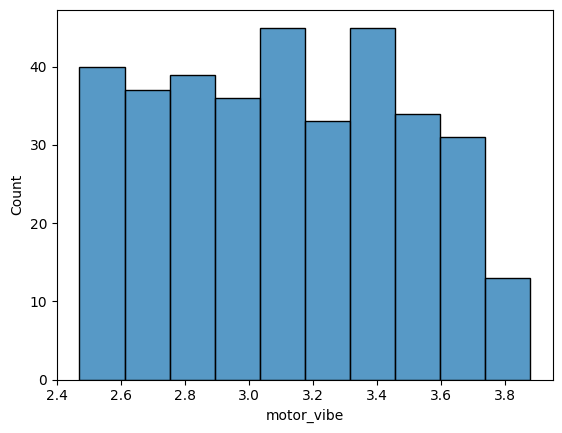

In [167]:
sns.histplot(df_copy.loc[df_copy['label'] == 0, 'motor_vibe'])

In [168]:
df.drop(df.loc[df['motor_vibe'] > 20, :].index, axis=0, inplace=True)

In [169]:
from imblearn.over_sampling import SMOTE, ADASYN

X = df.drop('label', axis=1)
y = df.loc[:,'label']

# SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

df = pd.concat([X_resampled, y_resampled], axis=1)

df
# # ADASYN
# adasyn = ADASYN()
# X_resampled, y_resampled = adasyn.fit_resample(X, y)

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
0,1.590000,41.000000,0.7,20.530000,1680.000000,58.670000,2.930000,0,1
1,2.970000,59.280000,0.7,38.400000,3142.000000,74.910000,3.750000,0,1
2,1.910000,45.290000,0.7,24.730000,2023.000000,62.480000,3.120000,0,1
3,2.370000,51.330000,0.7,30.630000,2506.000000,67.840000,3.390000,0,1
4,1.900000,45.210000,0.7,24.650000,2017.000000,62.410000,3.120000,0,1
...,...,...,...,...,...,...,...,...,...
4183,1.331958,46.521542,0.7,19.645667,2281.762498,63.349583,3.070000,1,0
4184,1.967328,59.397789,0.7,28.701869,3242.859197,74.887789,3.685920,1,0
4185,1.403776,47.994397,0.7,20.664190,2399.551727,64.663069,3.133776,1,0
4186,0.830000,35.801868,0.7,12.263121,1423.749425,53.819681,2.590000,1,0


In [170]:
df['label'].value_counts()

1    2094
0    2094
Name: label, dtype: int64

In [171]:
# manual parameter 
RATIO_TO_FRAUD = 15

# splitting by class
fraud = df[df.label == 1]
clean = df[df.label == 0]

# concatenate with fraud transactions into a single dataframe
visualisation_initial = pd.concat([fraud, clean])
column_names = list(visualisation_initial.drop('label', axis=1).columns)

# isolate features from labels 
features, labels = visualisation_initial.drop('label', axis=1).values, \
                   visualisation_initial.label.values

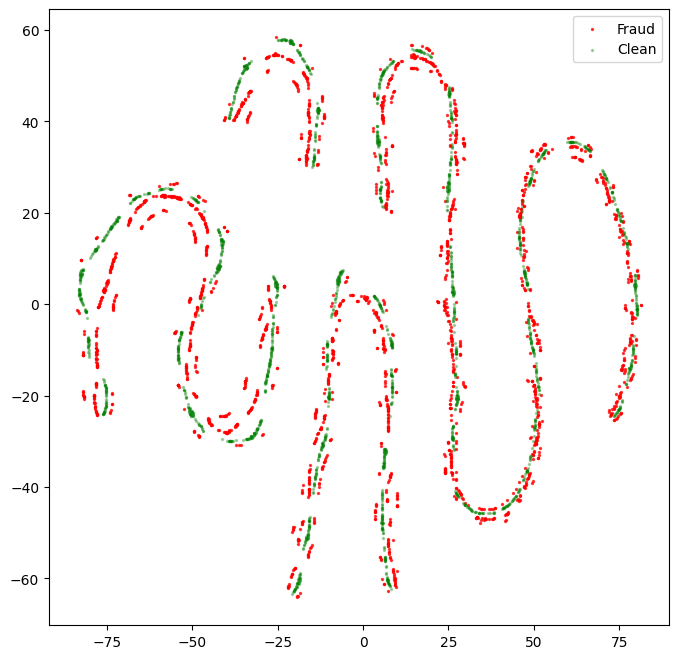

In [ ]:
# from sklearn.manifold import TSNE
# from mpl_toolkits.mplot3d import Axes3D

# def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
#     if dimensions not in (2, 3):
#         raise ValueError('tsne_scatter can only plot in 2d or 3d (What are you? An alien that can visualise >3d?). Make sure the "dimensions" argument is in (2, 3)')

#     # t-SNE dimensionality reduction
#     features_embedded = TSNE(n_components=dimensions, random_state=RANDOM_SEED).fit_transform(features)
    
#     # initialising the plot
#     fig, ax = plt.subplots(figsize=(8,8))
    
#     # counting dimensions
#     if dimensions == 3: ax = fig.add_subplot(111, projection='3d')

#     # plotting data
#     ax.scatter(
#         *zip(*features_embedded[np.where(labels==1)]),
#         marker='o',
#         color='r',
#         s=2,
#         alpha=0.7,
#         label='Fraud'
#     )
#     ax.scatter(
#         *zip(*features_embedded[np.where(labels==0)]),
#         marker='o',
#         color='g',
#         s=2,
#         alpha=0.3,
#         label='Clean'
#     )

#     # storing it to be displayed later
#     plt.legend(loc='best')
#     plt.savefig(save_as);
#     plt.show;

# tsne_scatter(features, labels, dimensions=2, save_as='tsne_initial_2d.png')

In [172]:
clean.shape, fraud.shape

((2094, 9), (2094, 9))

In [173]:
X_train = clean.drop('label', axis=1)

fraud = clean.iloc[-50:].append(fraud).sample(frac=1)

<ipython-input-173-11c4cb936fe0>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fraud = clean.iloc[-50:].append(fraud).sample(frac=1)


In [174]:
X_train.shape, fraud.shape

((2094, 8), (2144, 9))

In [175]:
from sklearn.model_selection import train_test_split

# X_train, X_val = train_test_split(X_train, test_size=0.1,
#                                   random_state=RANDOM_SEED)

X_test, y_test = fraud.drop('label', axis=1).values, fraud.label.values

In [176]:
X_train.shape, X_test.shape

((2094, 8), (2144, 8))

In [177]:
from sklearn.preprocessing import Normalizer, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# configure our pipeline
pipeline = Pipeline([('normalizer', Normalizer()),
                     ('scaler', RobustScaler())])

In [178]:
# get normalization parameters by fitting to the training data
pipeline.fit(X_train);

In [179]:
# transform the training and validation data with these parameters
X_train_transformed = pipeline.transform(X_train)
#X_validate_transformed = pipeline.transform(X_val)

In [180]:
tf.keras.backend.clear_session()

# data dimensions // hyperparameters 
input_dim = X_train_transformed.shape[1]
BATCH_SIZE = 16
EPOCHS = 100

# https://keras.io/layers/core/
autoencoder = tf.keras.models.Sequential([
    
    # deconstruct / encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )), 
    #tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(3, activation='elu'),
    
    # reconstruction / decode
    tf.keras.layers.Dense(4, activation='elu'),
    tf.keras.layers.Dense(8, activation='elu'),
    #tf.keras.layers.Dense(16, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')
    
])

# https://keras.io/api/models/model_training_apis/
autoencoder.compile(optimizer="adam", 
                    loss="mse",
                    metrics=["acc"])

# print an overview of our model
autoencoder.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
 dense_4 (Dense)             (None, 4)                 16        
                                                                 
 dense_5 (Dense)             (None, 8)                 40        
                                                                 
 dense_6 (Dense)             (None, 8)                 7

In [181]:
# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True
)

In [182]:
history = autoencoder.fit(
    X_train_transformed, X_train_transformed,
    shuffle=True,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    # callbacks=[early_stop],
    # validation_data=(X_validate_transformed, X_validate_transformed)
);

Epoch 1/100
131/131 [==============================] - 2s 4ms/step - loss: 81.7206 - acc: 0.5014
Epoch 2/100
131/131 [==============================] - 0s 3ms/step - loss: 73.3208 - acc: 0.5654
Epoch 3/100
131/131 [==============================] - 0s 3ms/step - loss: 59.3315 - acc: 0.4895
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 23.0285 - acc: 0.3787
Epoch 5/100
131/131 [==============================] - 0s 2ms/step - loss: 0.5903 - acc: 0.3897
Epoch 6/100
131/131 [==============================] - 0s 2ms/step - loss: 0.2561 - acc: 0.4484
Epoch 7/100
131/131 [==============================] - 0s 2ms/step - loss: 0.2381 - acc: 0.4518
Epoch 8/100
131/131 [==============================] - 0s 2ms/step - loss: 0.2229 - acc: 0.4441
Epoch 9/100
131/131 [==============================] - 0s 2ms/step - loss: 0.2143 - acc: 0.4503
Epoch 10/100
131/131 [==============================] - 0s 2ms/step - loss: 0.2026 - acc: 0.4489
Epoch 11/100
131/131 [=============

In [183]:
# transform the test set with the pipeline fitted to the training set
X_test_transformed = pipeline.transform(X_test)

# pass the transformed test set through the autoencoder to get the reconstructed result
reconstructions = autoencoder.predict(X_test_transformed)

39/67 [================>.............] - ETA: 0s

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(


67/67 [==============================] - 0s 1ms/step


In [184]:
# calculating the mean squared error reconstruction loss per row in the numpy array
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

In [185]:
clean.shape, fraud.shape

((2094, 9), (2144, 9))

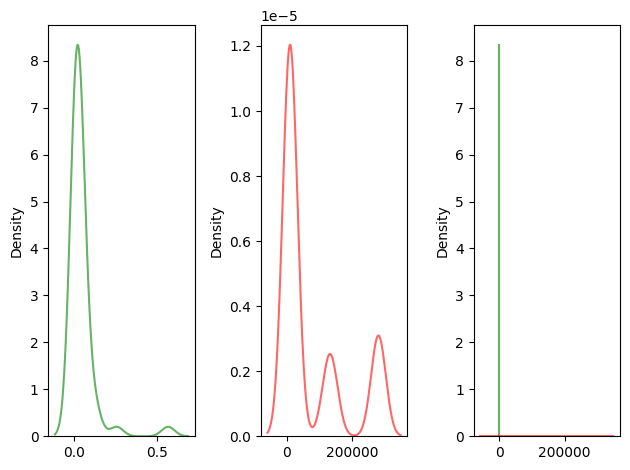

In [186]:
clean = mse[y_test==0]
fraud = mse[y_test==1]

plt.subplot(1,3,1)
sns.kdeplot(clean, label='clean', alpha=.6, color='green')
plt.subplot(1,3,2)
sns.kdeplot(fraud, label='fraud', alpha=.6, color='red')
plt.subplot(1,3,3)
sns.kdeplot(clean, label='clean', alpha=.6, color='green')
sns.kdeplot(fraud, label='fraud', alpha=.6, color='red')

plt.tight_layout()
plt.show()

<Axes: >

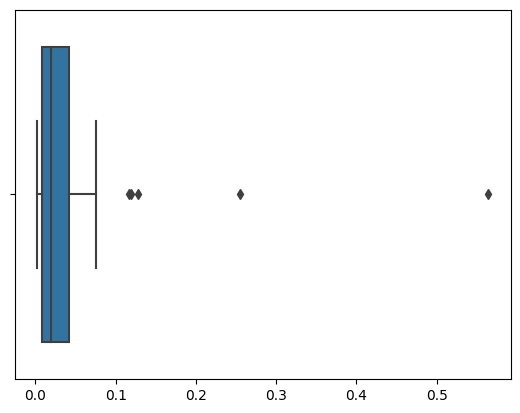

In [187]:
sns.boxplot(x=clean)

In [188]:
clean.max(), fraud.min()

(0.5643701260098182, 8986.980372499178)

## VAE 버전

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.datasets import mnist
import numpy as np

In [ ]:
# 모델 구성
input_dim = 8
hidden_dim = 16
latent_dim = 2

tf.keras.backend.clear_session()

inputs = Input(shape=(input_dim,), name='encoder_input')
x = Dense(hidden_dim, activation='elu')(inputs)
x = Dense(8, activation='elu')(x)
x = Dense(4, activation='elu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# VAE sampling
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# 인코더
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

# 디코더
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(4, activation='elu')(latent_inputs)
x = Dense(8, activation='elu')(x)
x = Dense(hidden_dim, activation='elu')(x)
outputs = Dense(input_dim, activation='elu')(x)
decoder = Model(latent_inputs, outputs, name='decoder')

# 엔드투엔드 VAE 모델
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

# 손실 함수
reconstruction_loss = binary_crossentropy(inputs, outputs)
reconstruction_loss *= input_dim
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

vae.compile(optimizer='adam')

In [ ]:
# 모델 학습
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',
                   patience=10,
                   restore_best_weights=True,
                   min_delta=0,
                   verbose=1)
vae.fit(X_train_transformed, validation_split=.2, callbacks=[es], epochs=100, batch_size=16)

Epoch 1/100
82/82 [==============================] - 2s 7ms/step - loss: 25.6335 - val_loss: 23.0704
Epoch 2/100
82/82 [==============================] - 0s 3ms/step - loss: 19.8551 - val_loss: 15.1390
Epoch 3/100
82/82 [==============================] - 0s 3ms/step - loss: 13.7141 - val_loss: 13.1594
Epoch 4/100
82/82 [==============================] - 0s 4ms/step - loss: 10.4493 - val_loss: 8.5336
Epoch 5/100
82/82 [==============================] - 0s 3ms/step - loss: 7.1648 - val_loss: 6.9252
Epoch 6/100
82/82 [==============================] - 0s 3ms/step - loss: 6.6215 - val_loss: 6.4216
Epoch 7/100
82/82 [==============================] - 0s 4ms/step - loss: 6.2417 - val_loss: 6.1614
Epoch 8/100
82/82 [==============================] - 0s 3ms/step - loss: 6.1440 - val_loss: 6.0377
Epoch 9/100
82/82 [==============================] - 0s 3ms/step - loss: 5.9587 - val_loss: 5.7288
Epoch 10/100
82/82 [==============================] - 0s 3ms/step - loss: 5.3866 - val_loss: 5.3470
Ep

In [ ]:
# transform the test set with the pipeline fitted to the training set
X_test_transformed = pipeline.transform(X_test)

# pass the transformed test set through the autoencoder to get the reconstructed result
reconstructions = vae.predict(X_test_transformed)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(


67/67 [==============================] - 0s 2ms/step


In [ ]:
# calculating the mean squared error reconstruction loss per row in the numpy array
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

In [ ]:
clean = mse[y_test==0]
fraud = mse[y_test==1]

plt.subplot(1,2,1)
plt.hist(clean, bins=50, density=True, label='clean', alpha=.6, color='green')
plt.subplot(1,2,2)
plt.hist(fraud, bins=50, density=True, label='fraud', alpha=.6, color='red')
plt.show()

In [ ]:
clean.max(), fraud.min()

(0.2570661831149732, 15.274967507797609)

In [ ]:
autoencoder.save('/content/drive/MyDrive/SPARK_AIVLE/models/model_20.h5')

autoencoder 20은 잘못 저장됨

In [189]:
test_data = pd.read_csv('/content/drive/MyDrive/SPARK_AIVLE/test_data_dim_2_train_all/test_30.csv')

test_data.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0,0


In [190]:
cond = (test_data['type'] == 1)
X_test = test_data.loc[cond, :].drop('label', axis=1)

In [191]:
len(X_test)

1107

In [192]:
# transform the test set with the pipeline fitted to the training set
X_test_transformed = pipeline.transform(X_test)

# pass the transformed test set through the autoencoder to get the reconstructed result
reconstructions = autoencoder.predict(X_test_transformed)

35/35 [==============================] - 0s 2ms/step


In [193]:
# calculating the mean squared error reconstruction loss per row in the numpy array
mse = np.mean(np.power(X_test_transformed - reconstructions, 2), axis=1)

In [194]:
mse.max()

1.0312917674999955

In [195]:
clean.max()

0.5643701260098182

In [196]:
pd.DataFrame(mse).sort_values(by=0, ascending=False)[:80]

,0
572,1.031292
791,0.876590
481,0.852524
925,0.783546
420,0.783546
...,...
349,0.221638
102,0.214166
635,0.214166
402,0.214166


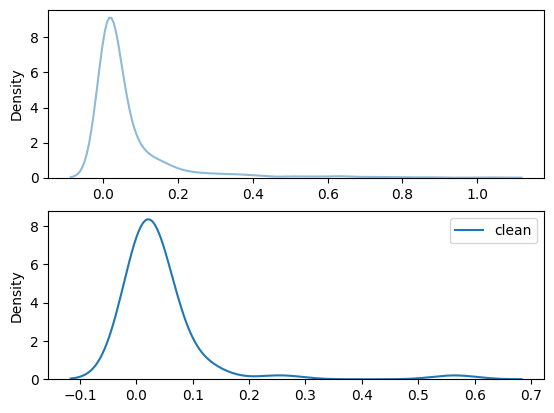

In [197]:
plt.subplot(2,1,1)
sns.kdeplot(mse, label='test', alpha=0.5)
plt.subplot(2,1,2)
sns.kdeplot(clean, label='clean')
plt.legend()
plt.show()

<Axes: >

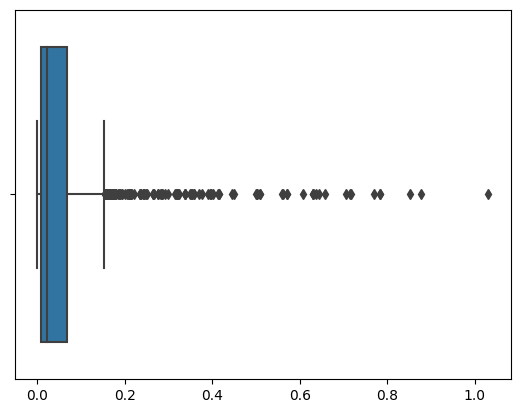

In [198]:
sns.boxplot(x=mse)

In [158]:
threshold = clean.mean() + clean.std() * 2

threshold

0.2279388839151716

In [199]:
test_data.loc[cond, 'label'] = np.where(mse > 1, 1, 0)

In [200]:
test_data.to_csv('/content/drive/MyDrive/SPARK_AIVLE/test_data_dim_2_train_all/test_30_20.csv', index=False)

별첨 : vae의 30_20 파일은 잘못 저장됨

In [124]:
semi_df = test_data.loc[(test_data['type'] == 1) & (test_data['label'] == 0), :]

semi_df.shape

(1106, 9)

In [125]:
df = pd.concat((df, semi_df), axis=0)

In [126]:
df.head()

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type,label
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0,1
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0,1
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0,1
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0,1
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0,1
